# The life of an athlete with type 1 diabetes: descriptives

Descriptives for the 2019 training season of 14 TNN athletes

In [1]:
import numpy as np
import pandas as pd
import datetime
import os
from copy import copy

from plot import *
from calc import glucose_levels, mmoll_mgdl, mgdl_mmoll, timestamp_to_seconds
from config import DATA_PATH

In [2]:
SAVE_PATH = 'results/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [3]:
COL = 'Glucose Value (mg/dL)'
SECTIONS = ('wake', 'exercise', 'recovery', 'sleep')

### Read data

**Athlete characteristics**

In [4]:
info = pd.read_csv(DATA_PATH+'agg/info.csv')
info = info.reset_index()
info = info.rename(columns={'index':'RIDER'})
info

,RIDER,gender,nationality,age,diabetes_duration,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max,height
0,1,M,Switzerland,22,11,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889,174.0
1,2,M,Italy,30,14,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285,178.0
2,3,M,Ireland,26,7,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164,171.0
3,4,M,Australia,19,7,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333,178.0
4,5,M,Netherlands,25,6,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143,183.0
5,6,M,Australia,20,9,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588,169.0
6,7,M,Italy,22,6,65.333333,8.066667,5.9,298.500000,171.500000,180.500000,72.203125,167.0
7,8,M,New Zealand,20,17,65.000000,11.900000,7.7,292.000000,187.000000,204.000000,64.000000,165.0
8,9,M,France,23,10,63.100000,8.533333,7.2,278.666667,182.333333,195.000000,67.522310,173.0
9,10,M,UK,27,17,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571,185.0


**Professional**

In [5]:
pro = pd.read_csv(DATA_PATH+'info/pro.csv')
pro = pro.sort_values('RIDER')

Select only people for whom we have *ethics*

In [6]:
pro = pro[pro.ethics == 1]
pro = pro.drop('ethics', axis=1)

# anonymize file
pro = pro.drop('name', axis=1)
pro['RIDER'] = pro['RIDER'].astype(int)
pro = pro.reset_index(drop=True)

pro

,RIDER,2014,2015,2016,2017,2018,2019,2020,2021
0,1,-,-,-,DEV,DEV,PRO,PRO,PRO
1,2,PRO,PRO,PRO,PRO,PRO,PRO,PRO,PRO
2,3,PRO,PRO,PRO,PRO,PRO,PRO,PRO,PRO
3,4,-,-,-,DEV,PRO,PRO,PRO,PRO
4,5,-,PRO,PRO,PRO,PRO,PRO,PRO,PRO
5,6,-,-,-,DEV,DEV,PRO,PRO,PRO
6,7,-,-,DEV,PRO,PRO,PRO,PRO,PRO
7,8,-,-,-,DEV,DEV,DEV,PRO,PRO
8,9,-,-,-,PRO,PRO,PRO,PRO,PRO
9,10,-,-,DEV,DEV,PRO,PRO,PRO,PRO


**Season dates**

In [7]:
season = pd.read_csv(DATA_PATH+'calendar/season_dates.csv', index_col=[0,1], header=[0,1])
season = season.reset_index().drop('level_1', axis=1)
season = season.rename(columns={'level_0':'RIDER'})
season

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


RIDER        2015                    2016                    2017  \
               start         end       start         end       start   
0      1         NaN         NaN         NaN         NaN  2016-12-06   
1      2  2014-11-17  2015-10-18  2015-11-24  2016-10-28  2016-11-15   
2      3  2014-11-06  2015-10-18  2015-11-06  2016-10-23  2016-12-06   
3      4         NaN         NaN         NaN         NaN  2016-11-15   
4      5  2014-11-14  2015-11-08  2015-11-27  2016-10-30  2016-11-12   
5      6         NaN         NaN         NaN         NaN  2016-12-12   
6      7         NaN         NaN  2015-10-07  2016-04-16  2016-11-07   
7      8         NaN         NaN         NaN         NaN  2016-12-14   
8      9         NaN         NaN         NaN         NaN  2016-12-06   
9     10         NaN         NaN  2015-11-06  2016-10-17  2016-11-04   
10    11  2014-11-02  2015-11-12  2015-12-01  2016-11-12  2016-12-07   
11    12  2014-11-15  2015-10-29  2015-11-24  2016-10-22  2016-11-07   
12    13         NaN         NaN         NaN         NaN         NaN   
13    14  2014-11-14  2015-10-25  2015-12-02  2016-10-30  2016-11-13   
14    15  2014-11-17  2015-10-18  2015-11-12  2016-10-23  2016-11-14   
15    16         NaN         NaN         NaN         NaN  2016-12-14   
16    17         NaN         NaN         NaN         NaN         NaN   
17    18         NaN         NaN         NaN         NaN  2016-12-13   

                      2018                    2019                    2020  \
           end       start         end       start         end       start   
0   2017-11-05  2017-11-13  2018-10-20  2018-11-05  2019-10-20  2019-11-04   
1   2017-09-11  2017-10-23  2018-10-02  2018-10-23  2019-10-16  2019-11-04   
2   2017-10-05  2017-11-13  2018-10-31  2018-11-19  2019-10-20  2019-11-13   
3   2017-09-30  2017-10-05  2018-11-01  2018-11-12  2019-10-16  2019-11-04   
4   2017-09-23  2017-10-03  2018-10-17  2018-11-12  2019-10-20  2019-11-11   
5   2017-10-14  2017-10-30  2018-10-25  2018-12-01  2019-10-01  2019-10-21   
6   2017-11-05  2017-11-28  2018-10-17  2018-11-29  2019-10-27  2019-12-02   
7   2017-11-05  2017-11-19  2018-12-12  2018-12-24  2019-10-16  2019-10-24   
8   2017-11-05  2017-11-20  2018-09-24  2018-11-05  2019-09-23  2019-10-14   
9   2017-11-12  2017-11-27  2018-11-10  2018-11-22  2019-10-28  2019-11-11   
10  2017-10-22         NaN         NaN  2018-10-15  2019-06-23  2019-10-23   
11  2017-10-31  2017-11-06  2018-11-11  2018-11-26  2019-11-05  2019-11-18   
12         NaN         NaN         NaN  2018-12-12  2019-10-20  2019-11-18   
13  2017-11-20  2017-12-21  2018-11-01  2018-11-12  2019-09-09  2019-10-21   
14  2017-11-01  2017-11-27  2018-10-21  2018-11-12  2019-10-20  2019-11-09   
15  2017-09-10  2017-11-21  2018-11-02  2018-11-19  2019-09-29  2019-11-14   
16         NaN         NaN         NaN         NaN         NaN         NaN   
17  2017-10-22  2017-11-20  2018-08-12  2018-10-22  2019-10-13  2019-11-09   

                      2021              
           end       start         end  
0   2020-09-23  2020-10-08  2021-10-30  
1   2020-10-11  2020-11-09  2021-10-04  
2   2020-10-16  2020-11-16  2021-10-03  
3   2020-10-28  2020-11-16  2021-08-14  
4   2020-10-31  2020-11-16  2021-08-31  
5   2020-07-17  2020-11-01  2021-09-03  
6   2020-10-12  2020-11-09  2021-09-30  
7   2020-09-27  2020-11-01  2021-10-03  
8   2020-10-12  2020-11-05  2021-10-01  
9   2020-10-11  2020-11-16  2021-10-17  
10  2020-10-02  2020-11-01  2021-09-17  
11  2020-10-08  2020-11-01  2021-09-03  
12  2020-10-11  2020-11-16  2021-09-05  
13  2020-10-12  2020-11-02  2021-09-20  
14  2020-10-15  2020-11-07  2021-10-29  
15  2020-10-31  2020-11-23  2021-09-30  
16         NaN         NaN         NaN  
17  2020-10-18  2020-11-11  2021-10-05

**TrainingPeaks (aggregated)**

In [8]:
tp_agg = pd.read_csv(DATA_PATH+'agg/trainingpeaks_day.csv', index_col=[0,1], header=[0,1])
tp_agg = tp_agg.reset_index()
tp_agg['date'] = pd.to_datetime(tp_agg['date'])
tp_agg

RIDER       date            TIME                       \
                       timestamp_count  local_timestamp_min   
0         1 2016-11-22          7446.0  2016-11-22 12:58:57   
1         1 2016-11-23          7312.0  2016-11-23 14:29:13   
2         1 2016-11-24          6285.0  2016-11-24 09:53:38   
3         1 2016-11-26          7445.0  2016-11-26 10:00:35   
4         1 2016-12-06         11222.0  2016-12-06 09:11:34   
...     ...        ...             ...                  ...   
30207    18 2021-11-18          4767.0  2021-11-18 14:58:17   
30208    18 2021-11-25         10912.0  2021-11-25 09:50:57   
30209    18 2021-11-26          8737.0  2021-11-26 10:12:34   
30210    18 2021-11-27         18222.0  2021-11-27 09:31:58   
30211    18 2021-11-28         14549.0  2021-11-28 10:02:22   

                           CALENDAR                                   \
       local_timestamp_max     race travel race_3d_mean race_7d_mean   
0      2016-11-22 15:15:40    False   True          0.0          0.0   
1      2016-11-23 16:35:14    False  False          0.0          0.0   
2      2016-11-24 16:56:38    False  False          0.0          0.0   
3      2016-11-26 12:12:52    False  False          0.0          0.0   
4      2016-12-06 16:11:38    False  False          0.0          0.0   
...                    ...      ...    ...          ...          ...   
30207  2021-11-18 16:19:15    False  False          0.0          0.0   
30208  2021-11-25 12:54:14    False  False          0.0          0.0   
30209  2021-11-26 12:39:08    False  False          0.0          0.0   
30210  2021-11-27 14:36:43    False  False          0.0          0.0   
30211  2021-11-28 14:21:57    False  False          0.0          0.0   

                     ...             LOC                                  \
      travel_3d_any  ... distance_up_std distance_up_min distance_up_max   
0              True  ...    17801.944942            3.02        60211.87   
1              True  ...    19148.044265            0.00        66126.45   
2              True  ...     9053.264194            3.43        34317.18   
3             False  ...    18440.805479            1.10        65340.95   
4             False  ...    19543.224138            0.00        64799.24   
...             ...  ...             ...             ...             ...   
30207         False  ...     9128.714210            0.00        29709.74   
30208         False  ...    21912.188008            0.00        80574.10   
30209         False  ...    19439.456819            0.00        62597.98   
30210         False  ...    38862.374584            0.00       130010.95   
30211         False  ...    33132.807679            3.57       109086.89   

                                                                            \
      distance_up_sum distance_up_energy distance_up_peaks distance_up_rms   
0        1.615842e+08       6.454802e+12               0.0    29442.856294   
1        2.109715e+08       9.441041e+12               0.0    35932.864834   
2        6.765391e+07       1.379010e+12               0.0    14812.591736   
3        1.908990e+08       8.218843e+12               0.0    33225.612828   
4        2.761122e+08       1.133536e+13               1.0    31782.096599   
...               ...                ...               ...             ...   
30207    5.001524e+07       1.099600e+12               0.0    15187.800246   
30208    2.989028e+08       1.488329e+13               0.0    36931.529437   
30209    1.875908e+08       8.146286e+12               0.0    30535.051494   
30210    7.310406e+08       6.144018e+13               0.0    58066.844495   
30211    5.640191e+08       4.316849e+13               0.0    54471.190338   

                                                           
      distance_up_iqr acceleration_iqr elevation_gain_iqr  
0                 NaN              NaN                NaN  
1                 NaN              NaN                NaN  
2    

**Dexcom (aggregated)**

In [9]:
dc_agg = pd.read_csv(DATA_PATH+'agg/dexcom_day.csv')
dc_agg['date'] = pd.to_datetime(dc_agg['date'])

dc_agg = dc_agg.dropna(subset=['glucose_mean_1d'])
dc_agg

/local/home/evanweenen/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RIDER,date,time_in_hypo_exercise,time_in_hypoL2_exercise,time_in_hypoL1_exercise,time_in_target_exercise,time_in_hyper_exercise,time_in_hyperL1_exercise,time_in_hyperL2_exercise,glucose_mean_exercise,...,glucose_std_14d,glucose_cv_14d,glucose_rate_14d,completeness_14d,count_14d,LBGI_14d,HBGI_14d,AUC_14d,hypo_14d,hyper_14d
1351,1,2017-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,40.969276,0.255206,160.534091,0.021825,88,0.005351,0.130489,NaN,False,True
1352,1,2017-09-13,0.0,0.0,0.0,66.0,3.0,3.0,0.0,122.130435,...,46.700315,0.283073,164.976064,0.093254,376,0.012055,0.635608,NaN,False,True
1353,1,2017-09-14,0.0,0.0,0.0,19.0,8.0,8.0,0.0,173.370370,...,48.064211,0.322406,149.079882,0.167659,676,0.066239,0.843973,NaN,True,True
1354,1,2017-09-15,7.0,0.0,7.0,107.0,17.0,17.0,0.0,118.305344,...,48.532327,0.357283,135.837137,0.239087,964,0.217768,0.914079,NaN,True,True
1355,1,2017-09-16,0.0,0.0,0.0,29.0,9.0,9.0,0.0,164.473684,...,46.039394,0.339021,135.800844,0.293899,1185,0.262059,1.050506,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52563,18,2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.477125,0.438070,165.446548,0.930308,3751,1.530467,8.235034,NaN,True,True
52564,18,2021-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.514296,0.433276,167.362961,0.934772,3769,1.403618,8.454066,NaN,True,True
52565,18,2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.671939,0.440168,167.372321,0.937252,3779,1.487598,8.546353,NaN,True,True
52566,18,2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.043166,0.432544,168.868784,0.952629,3841,1.431049,8.835614,NaN,True,True


In [10]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc_agg.RIDER.unique()), "; D =", len(dc_agg))

Data available: 
TrainingPeaks: N = 18 ; D = 30212
Dexcom: N = 18 ; D = 11786


### Select data

Select riders that were pro in 2019

In [11]:
ATHLETES = pro.loc[pro['2019'] == 'PRO', 'RIDER'].to_list()

In [12]:
info = info[info.RIDER.isin(ATHLETES)].set_index('RIDER')
season = season[season.RIDER.isin(ATHLETES)].set_index('RIDER')

In [13]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)]))
print("Dexcom: N =", len(dc_agg[dc_agg.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(dc_agg[dc_agg.RIDER.isin(ATHLETES)]))

Data available: 
TrainingPeaks: N = 14 ; D = 25116
Dexcom: N = 14 ; D = 9229


Select beginning and end of the training season in 2019

In [14]:
season = season['2019']

season['start'] = pd.to_datetime(season['start'])
season['end'] = pd.to_datetime(season['end'])

season_list = season.apply(lambda x: pd.date_range(x[0], x[1], freq='1D'), axis=1)\
    .apply(pd.Series).stack().reset_index().drop('level_1', axis=1).rename(columns={0:'date'})

tp_agg = pd.merge(tp_agg, season_list, how='inner', on=['RIDER', 'date'])

dc_agg = pd.merge(dc_agg, season_list, how='inner', on=['RIDER', 'date'])

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [15]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc_agg.RIDER.unique()), "; D =", len(dc_agg))

Data available: 
TrainingPeaks: N = 14 ; D = 3828
Dexcom: N = 14 ; D = 3060


Select data with glucose completeness >= 70% and remove nans from dexcom data

In [16]:
dc_agg = dc_agg[dc_agg['completeness_1d'] >= 0.7]

In [17]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc_agg.RIDER.unique()), "; D =", len(dc_agg))

Data available: 
TrainingPeaks: N = 14 ; D = 3828
Dexcom: N = 14 ; D = 2120


### Prepare features

Glucose data preparation

In [18]:
dc_agg = dc_agg.set_index(['RIDER', 'date'])

col_mask = dc_agg.columns.str.startswith('hypo') |  dc_agg.columns.str.startswith('hyper')
dc_agg.loc[:, col_mask] = dc_agg.loc[:, col_mask].astype('category')

# calculate percentage in glucose levels
for sec in ('wake', 'sleep', 'exercise', 'recovery', '1h', '3h', '6h', '12h', '18h', '1d', '3d', '7d', '14d'):
    cols_zones = [f'time_in_{n}_{sec}' for n in ('hypo', 'hypoL2', 'hypoL1', 'target', 'hyper', 'hyperL1', 'hyperL2')]
    dc_agg[['perc'+col.lstrip('time') for col in cols_zones]] = dc_agg[cols_zones].apply(lambda col: col.divide(dc_agg['count_'+sec]))
    dc_agg = dc_agg.drop(cols_zones, axis=1)

# move all data from sleep to the next day, so that sleep always contains next day sleep
date_range = pd.date_range(start=season['start'].min(), end=season['end'].max())
dc_agg = dc_agg.reindex(pd.MultiIndex.from_product([dc_agg.index.get_level_values(0).unique(), date_range], names=['RIDER', 'date']))

cols_sleep = dc_agg.columns[dc_agg.columns.str.endswith('sleep')]
dc_agg[cols_sleep] = dc_agg.groupby('RIDER')[cols_sleep].apply(lambda x: x.shift(-1))

# drop samples if either glucose during wake, sleep, exercise or recovery is zero
dc_agg = dc_agg.dropna(subset=['glucose_mean_wake', 'glucose_mean_sleep', 'glucose_mean_exercise', 'glucose_mean_sleep'], how='any')

In [19]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc_agg.index.get_level_values(0).unique()), "; D =", len(dc_agg))

Data available: 
TrainingPeaks: N = 14 ; D = 3828
Dexcom: N = 14 ; D = 1612


TrainingPeaks data preparation

In [20]:
# TODO: count is not exactly duration (because we only count when there's a measurement)

# prepare time features
tp_agg[('TIME', 'time_start')] = timestamp_to_seconds(tp_agg[('TIME', 'local_timestamp_min')])
tp_agg[('TIME', 'time_end')] = timestamp_to_seconds(tp_agg[('TIME', 'local_timestamp_max')])
tp_agg = tp_agg.drop([('TIME', 'local_timestamp_min'),
                      ('TIME', 'local_timestamp_max')], axis=1)
tp_agg = tp_agg.rename(columns={'timestamp_count':'duration'})

# get day in season
season_list['day_in_season'] = season_list.groupby('RIDER')['date'].transform(lambda x: x - x.min()).dt.days
season_list.columns = pd.MultiIndex.from_tuples([('RIDER', ''), ('date', ''), ('TIME', 'day_in_season')])
tp_agg = pd.merge(tp_agg, season_list, how='left', on=['RIDER', 'date'])

# calculate percentage in zones
cols_zones = [('POWER', 'time_in_power_zone%s'%n) for n in range(1,7)] + [('HR', 'time_in_hr_zone%s'%n) for n in range(1,6)]
tp_agg[[(mod, 'perc'+c.lstrip('time')) for (mod, c) in cols_zones]] = tp_agg[cols_zones].apply(lambda col: col.divide(tp_agg[('TIME', 'duration')]))
tp_agg = tp_agg.drop(cols_zones, axis=1)

# rename
tp_agg = tp_agg.rename(columns={'chronic_training_load'  :'fitness', 
                                'acute_training_load'    :'fatigue', 
                                'training_stress_balance':'form'})

cols_cat = [('CALENDAR', 'race'), ('CALENDAR', 'travel'),
            ('CALENDAR', 'travel_3d_any'), ('CALENDAR', 'travel_7d_any')]
tp_agg[cols_cat] = tp_agg[cols_cat].astype('category')

# replace np.inf
tp_agg = tp_agg.replace({np.inf:np.nan})

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Replace extreme values

In [21]:
from scipy.stats import zscore

def clip_extremes(df, z_max=4, **kwargs):
    """
    Clip extreme values: when values exceed z_max, replace with mu+-z_max*std
    """
    z = zscore(df, **kwargs)
    mu = df.mean() 
    sigma = df.std()
    df = df.mask(z > z_max, mu + z_max*sigma)
    df = df.mask(z < -z_max, mu - z_max*sigma)
    return df
    
# note: we do not winsorize as that is based on percentiles, rather clip based on std
cols_extreme = tp_agg.set_index(['RIDER', 'date']).columns.drop(cols_cat).drop([('CALENDAR', 'race_3d_mean'), 
                                                                                ('CALENDAR', 'race_7d_mean')])
z = np.abs(zscore(tp_agg[cols_extreme], nan_policy='omit'))
print("Percentage of extreme values in data: {:.2f}%".format(
    (z > 4).sum().sum() / tp_agg[cols_extreme].count().sum() * 100))
for col in cols_extreme:
    tp_agg[col] = clip_extremes(tp_agg[col], nan_policy='omit')
# TODO: aggregate on raw data (clip peaks??)

Percentage of extreme values in data: 0.45%


Select only features that we think are relevant for this analysis

In [22]:
cols_X = ['TIME_duration',
          'HR_heart_rate_mean', # alternative: POWER_efficiency_factor'
          'POWER_intensity_factor', # alternatives: POWER_normalised_power, POWER_power_sum
                    
         # alternatives
          #'POWER_perc_in_power_zone1',
          #'POWER_perc_in_power_zone2',
          #'POWER_perc_in_power_zone3',
          #'POWER_perc_in_power_zone4',
          #'POWER_perc_in_power_zone5',
          #'POWER_perc_in_power_zone6',
          #'HR_perc_in_hr_zone1',
          #'HR_perc_in_hr_zone2',
          #'HR_perc_in_hr_zone3',
          #'HR_perc_in_hr_zone4',
          #'HR_perc_in_hr_zone5',
          
         # first-order variables of interest ("smarter" versions
          'POWER_training_stress_score', # too high correlation 
          #'POWER_fitness',
          #'POWER_fatigue', # too high correlation
          #'POWER_form',
          'POWER_variability_index',
          'POWER_efficiency_factor',
          
         # second-order variables of interest
          'CALENDAR_travel_3d_any',
          'CALENDAR_race',

         # external (controlling variables
          'TIME_time_start',
          'TIME_day_in_season',
          'CALENDAR_country_carbs',
          'LOC_temperature_min',
          'LOC_temperature_max',
          'LOC_altitude_mean',
         ]

In [23]:
tp_agg = tp_agg.set_index(['RIDER', 'date'])
tp_agg.columns = ['_'.join(col) for col in tp_agg.columns]
X = tp_agg[cols_X]

In [24]:
X

TIME_duration  HR_heart_rate_mean  POWER_intensity_factor  \
RIDER date                                                                    
1     2018-11-05         7767.0          166.758017                0.710002   
      2018-11-06         8065.0          156.035338                0.592906   
      2018-11-07        11349.0          160.294387                0.710153   
      2018-11-08         7649.0          147.380180                0.681450   
      2018-11-09        11297.0          145.930854                0.709012   
...                         ...                 ...                     ...   
16    2019-09-22         7113.0          149.778996                0.891305   
      2019-09-24         6530.0          124.869832                0.493494   
      2019-09-27         7462.0                 NaN                0.527048   
      2019-09-28         3157.0          144.937758                0.256291   
      2019-09-29         3188.0          132.460163                0.277357   

                  POWER_variability_index  POWER_efficiency_factor  \
RIDER date                                                           
1     2018-11-05                 1.041687                 1.307108   
      2018-11-06                 1.038430                 1.166545   
      2018-11-07                 1.042305                 1.360103   
      2018-11-08                 1.025518                 1.419493   
      2018-11-09                 1.031151                 1.491575   
...                                   ...                      ...   
16    2019-09-22                 1.330303                 1.686060   
      2019-09-24                 1.158808                 1.119751   
      2019-09-27                 1.177619                      NaN   
      2019-09-28                 1.065261                 0.501013   
      2019-09-29                 1.059297                 0.593268   

                 CALENDAR_travel_3d_any CALENDAR_race  TIME_time_start  \
RIDER date                                                               
1     2018-11-05                  False         False          34453.0   
      2018-11-06                  False         False          33856.0   
      2018-11-07                  False         False          36329.0   
      2018-11-08                  False         False          35558.0   
      2018-11-09                  False         False          40467.0   
...                                 ...           ...              ...   
16    2019-09-22                  False          True          36018.0   
      2019-09-24                   True         False          56356.0   
      2019-09-27                  False         False          53403.0   
      2019-09-28                  False         False          28114.0   
      2019-09-29                  False         False          28816.0   

                  TIME_day_in_season  CALENDAR_country_carbs  \
RIDER date                                                     
1     2018-11-05                   0                 1636.37   
      2018-11-06                   1                 1636.37   
      2018-11-07                   2                 1636.37   
      2018-11-08                   3                 1636.37   
      2018-11-09                   4                 1636.37   
...                              ...                     ...   
16    2019-09-22                 307                 1853.01   
      2019-09-24                 309                 1767.30   
      2019-09-27                 312                 1767.30   
      2019-09-28                 313                 1767.30   
      2019-09-29                 314                 1767.30   

                  LOC_temperature_min  LOC_temperature_max  LOC_altitude_mean  
RIDER date                                                                     
1     2018-11-05                  5.0                 18.0         438.332046  
      2018-11-06                  6.0      

Plot distributions

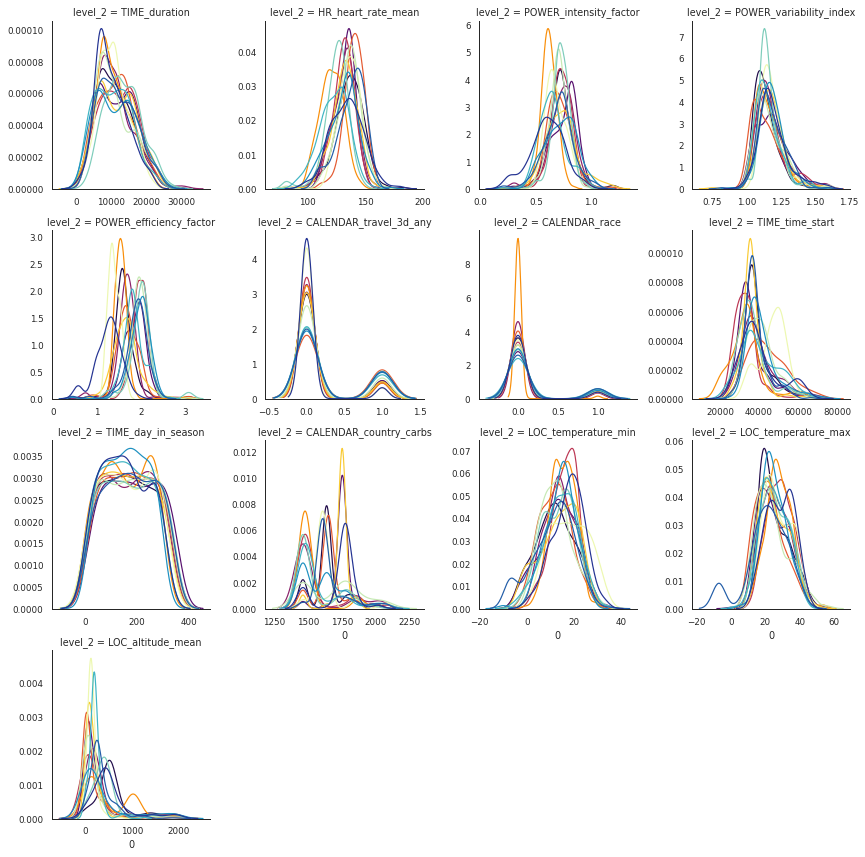

In [25]:
g = sns.FacetGrid(X.astype(float).stack().reset_index(), hue='RIDER', palette=palette_ath, 
                  col="level_2", col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, 0)

# TODO: check individual peaks and perhaps clean them out?

Plot correlations

In [26]:
corr = X.corr()

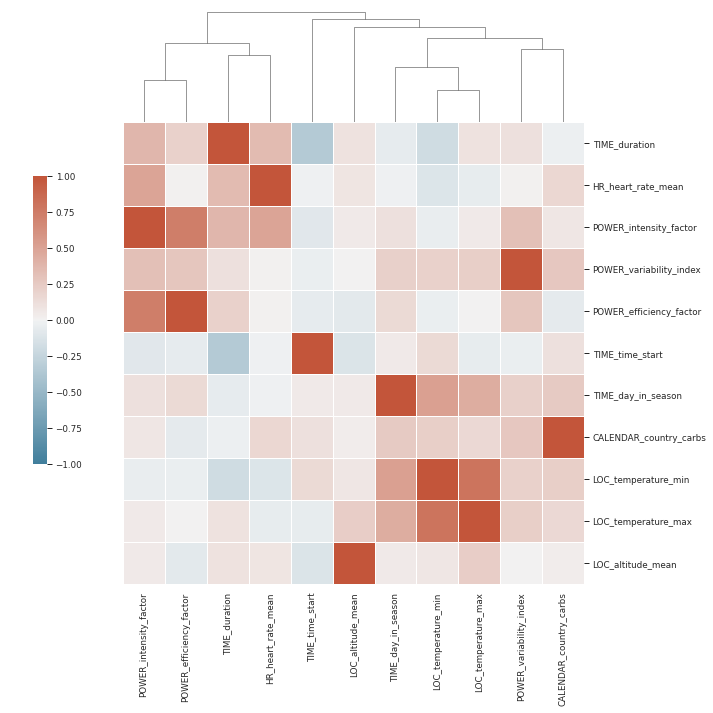

In [27]:
sns.clustermap(corr, vmin=-1, vmax=1, center=0, row_cluster=False, cbar_pos=(0.05, .35, .02, .4),
    linewidths=.5, cmap=sns.diverging_palette(230,20,as_cmap=True))
plt.xlabel('') ; plt.ylabel('') ; plt.show()

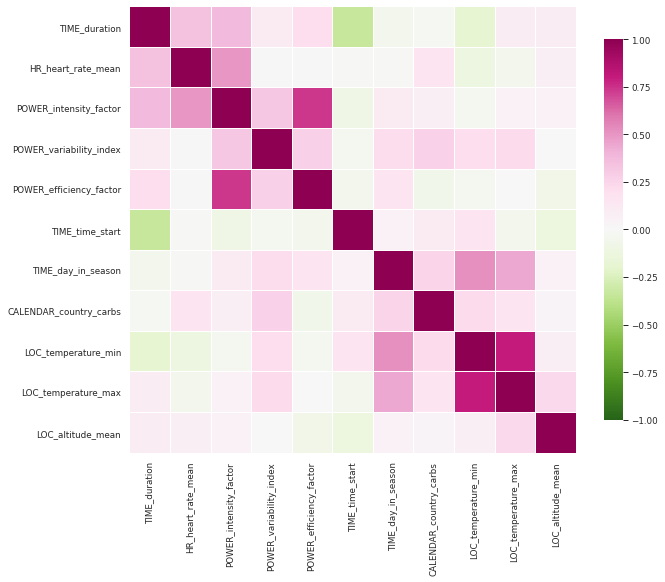

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='PiYG_r',
            linewidths=.5, cbar_kws=dict(shrink=0.7), square=True)
plt.xlabel('') ; plt.ylabel('') ; plt.show()

In [29]:
cols_y = ['perc_in_hypo_exercise', 'perc_in_hypo_recovery', 'perc_in_hypo_wake', 'perc_in_hypo_sleep']
y = dc_agg[cols_y]

cols_y = pd.MultiIndex.from_product([['GLUCOSE'], cols_y])
y.columns = cols_y

Preprocessing pipeline (separate for two data sources)

In [30]:
# TODO: scale per individual athlete
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

def preprocessing(df):    
    # normalize
    cols_scale = df.columns[(df.dtypes == float) | (df.dtypes == int)]
    scaler = StandardScaler()
    df[cols_scale] = scaler.fit_transform(df[cols_scale])

    # remove features with more than 30% nan
    plt.hist(df.notna().sum() / df.shape[0]) ; plt.axvline(0.3, color='red') ; plt.xlim((0,1)) ; plt.show()
    print("DROP: features with more than 30% nan: ", df.columns[df.notna().sum() / df.shape[0] < 0.3])
    df = df[df.columns[df.notna().sum() / df.shape[0] >= 0.3]]

    # remove features with low variance
    selector = VarianceThreshold()
    selector.fit(df)
    print("DROP: features with zero variance: ", df.columns[~selector.get_support()])
    df = df.loc[:, selector.get_support()]
    
    # impute variables
    imputer = SimpleImputer()
    df[:] = imputer.fit_transform(df)
    
    # remove multicollinearity with variance inflation factor
    df['const'] = 1
    vif = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns)
    print("DROP: features with high VIF: ", vif[vif > 10])
    df = df[vif.index[vif <= 10]]
    if 'const' in df:
        df = df.drop('const', axis=1)
    return df

/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


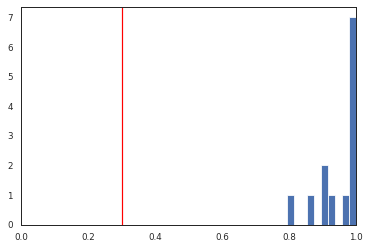

DROP: features with more than 30% nan:  Index([], dtype='object')
DROP: features with zero variance:  Index([], dtype='object')
DROP: features with high VIF:  Series([], dtype: float64)


In [31]:
X = preprocessing(X)
X = X.reset_index()

*Note: VIF is infinite if there is 100% correlation*

Merge cycling + glucose data

In [32]:
y = y.reset_index()

data = pd.merge(X, y, on=['RIDER', 'date'], how='inner') # TODO: think about how
data = data.drop('date', axis=1)
data = data.set_index('RIDER')

X = data[cols_X]
y = data[cols_y]

y.columns = ['_'.join(col) for col in y.columns]

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/local/home/evanweenen/.local/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/local/home/evanweenen/.local/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/local/home/evanweenen/.local/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


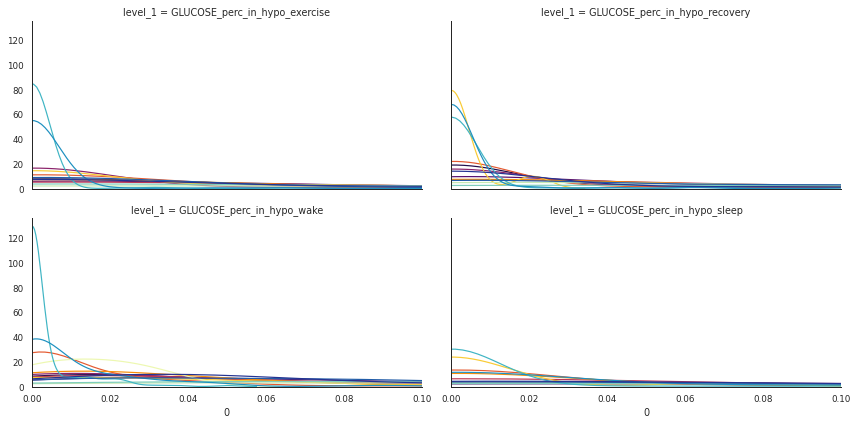

In [33]:
g = sns.FacetGrid(y.stack().reset_index(), col="level_1", col_wrap=2, height=3, aspect=2, xlim=(0,.1),
                  hue='RIDER', palette=palette_ath)
g.map(sns.kdeplot, 0, common_norm=True)

In [34]:
print("Data available: N =", len(data.index.get_level_values(0).unique()), "; D =", len(data))

Data available: N = 14 ; D = 1611


### Statistical analysis

**IDEAS**
- Zero-inflated model (split into log-res and normal res)
- Only add random effects for variables that you are interested in (or that make sense)

In [35]:
from rpy2.robjects.packages import importr

from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

base = importr('base')
stats = importr('stats')
lme4 = importr('lme4')

/local/home/evanweenen/.local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [57]:
from itertools import combinations

def get_formula(X, y, interactions=False, random_effects=False):
    
    cols_X = X.columns if type(X) == pd.DataFrame else [X.name]
    groups = list(X.index.names)[0]
    
    # create joint dataframe
    X = X.reset_index()
    y = y.reset_index(drop=True)
    y = y.to_frame() if type(y) == pd.Series else y
    data = pd.concat([X, y], axis=1)
    
    # get formula
    formula_y = y.columns[0] + '~'
    formula_fix = '1+' + '+'.join(cols_X)
    formula_int = ''.join([f'+{col_A}*{col_B}' if interactions else '' for col_A, col_B in combinations(cols_X, 2)])
    if random_effects:
        formula_rnd = f'+(1|{groups})+' + '+'.join([f'({col}|{groups})' for col in cols_X])
    else:
        formula_rnd = f'+(1|{groups})'

    return data, (formula_y, formula_fix, formula_int, formula_rnd)

In [62]:
def GLMM(X, y, family='binomial', fname='', **kwargs):    
    
    data, formula = get_formula(X, y, **kwargs)
    formula = ''.join(formula)

    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(data)
        
    model = lme4.glmer(formula, data=r_df, family=family)
    
    base.sink(f'{SAVE_PATH}model_{family}_{fname}.txt')
    print(base.summary(model))
    base.sink()  # returns output to the console

    return model, base.summary(model)

In [38]:
X

,TIME_duration,HR_heart_rate_mean,POWER_intensity_factor,POWER_variability_index,POWER_efficiency_factor,CALENDAR_travel_3d_any,CALENDAR_race,TIME_time_start,TIME_day_in_season,CALENDAR_country_carbs,LOC_temperature_min,LOC_temperature_max,LOC_altitude_mean
RIDER,,,,,,,,,,,,,
1,-0.703021,2.796759,0.061562,-1.278566,-1.385995,0.0,0.0,-0.505246,-1.739961,0.021392,-1.219138,-0.858382,0.273887
1,-0.645021,1.928133,-0.881411,-1.310484,-1.824028,0.0,0.0,-0.573752,-1.729505,0.021392,-1.083265,-0.744019,0.208766
1,-0.005848,2.273151,0.062773,-1.272508,-1.220847,0.0,0.0,-0.289975,-1.719049,0.021392,-1.083265,-0.972744,0.637443
1,-0.725988,1.226992,-0.168369,-1.437063,-1.035771,0.0,0.0,-0.378447,-1.708592,0.021392,-1.083265,-1.315831,0.517917
1,-0.015969,1.109585,0.053590,-1.381842,-0.811144,0.0,0.0,0.184862,-1.698136,0.021392,-0.947391,-0.515294,0.559446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,-0.914586,-1.500632,-0.840375,0.447741,-0.815858,0.0,0.0,-0.258189,-1.081213,-1.080729,-0.403896,-0.629657,-0.670531
16,1.823113,1.705637,0.769894,0.526586,-0.863039,0.0,0.0,-0.414708,-1.070757,-1.080729,-1.626759,-1.658919,0.176041
16,0.523747,0.244530,0.498398,0.473575,-0.470193,0.0,0.0,-0.315449,-1.060300,-1.080729,-0.675644,-0.400932,0.010397


In [39]:
y = (y['GLUCOSE_perc_in_hypo_sleep'] == 0).astype(float)
y

RIDER
1     0.0
1     0.0
1     1.0
1     0.0
1     0.0
     ... 
16    1.0
16    1.0
16    0.0
16    1.0
16    0.0
Name: GLUCOSE_perc_in_hypo_sleep, Length: 1611, dtype: float64

### Simple model

In [42]:
model, summary = GLMM(X[['HR_heart_rate_mean', 'TIME_duration', 'POWER_intensity_factor']], y, fname='duration_hr_if')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + HR_heart_rate_mean + TIME_duration +  
    POWER_intensity_factor + (1 | RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L

### First-order variables of interest (individual models)

In [43]:
model, summary = GLMM(X['TIME_duration'], y, fname='duration')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + TIME_duration + (1 | RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 

In [44]:
model, summary = GLMM(X['POWER_intensity_factor'], y, fname='if')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + POWER_intensity_factor + (1 |  
    RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,

In [45]:
model, summary = GLMM(X['HR_heart_rate_mean'], y, fname='hr')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + HR_heart_rate_mean + (1 | RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L,

In [46]:
model, summary = GLMM(X[['HR_heart_rate_mean', 'TIME_duration']], y, fname='duration_hr')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + HR_heart_rate_mean + TIME_duration +  
    (1 | RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,

In [61]:
model, summary = GLMM(X[['POWER_intensity_factor', 'TIME_duration']], y, fname='duration_if')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
GLUCOSE_perc_in_hypo_sleep ~ 1 + POWER_intensity_factor + TIME_duration +  
    (1 | RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L

In [63]:
model, summary = GLMM(X[['POWER_intensity_factor', 'TIME_duration']], y, fname='duration*if', interactions=True, )
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
GLUCOSE_perc_in_hypo_sleep ~ 1 + POWER_intensity_factor + TIME_duration +  
    POWER_intensity_factor * TIME_duration + (1 | RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1

In [64]:
model, summary = GLMM(X[['POWER_variability_index']], y, fname='vi')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + POWER_variability_index + (1 |  
    RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L

In [65]:
model, summary = GLMM(X[['POWER_efficiency_factor']], y, fname='ef')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + POWER_efficiency_factor + (1 |  
    RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L

In [66]:
model, summary = GLMM(X[['CALENDAR_race']], y, fname='race')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + CALENDAR_race + (1 | RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 

In [67]:
model, summary = GLMM(X[['CALENDAR_travel_3d_any']], y, fname='travel')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: GLUCOSE_perc_in_hypo_sleep ~ 1 + CALENDAR_travel_3d_any + (1 |  
    RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,

### Add secondary order variables

In [68]:
model, summary = GLMM(X[['TIME_duration', 'POWER_intensity_factor', 'CALENDAR_race', 'CALENDAR_travel_3d_any']], y, fname='duration_if_race_travel')
print(summary)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
GLUCOSE_perc_in_hypo_sleep ~ 1 + TIME_duration + POWER_intensity_factor +  
    CALENDAR_race + CALENDAR_travel_3d_any + (1 | RIDER)
   Data: structure(list(RIDER = c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L,  
1

In [48]:
X

,TIME_duration,HR_heart_rate_mean,POWER_power_mean,LOC_elevation_gain_up_sum,POWER_training_stress_score,POWER_variability_index,POWER_efficiency_factor,CALENDAR_travel_3d_any,CALENDAR_race,TIME_time_start,TIME_day_in_season,CALENDAR_country_carbs,LOC_temperature_min,LOC_temperature_max,LOC_altitude_mean
RIDER,,,,,,,,,,,,,,,
1,-0.703021,2.796759,0.244452,-0.674385,-0.605166,-1.278566,-1.385995,0.0,0.0,-0.505246,-1.739961,0.021392,-1.219138,-0.858382,0.273887
1,-0.645021,1.928133,-0.598996,-0.885306,-0.891022,-1.310484,-1.824028,0.0,0.0,-0.573752,-1.729505,0.021392,-1.083265,-0.744019,0.208766
1,-0.005848,2.273151,0.242471,0.191898,-0.126686,-1.272508,-1.220847,0.0,0.0,-0.289975,-1.719049,0.021392,-1.083265,-0.972744,0.637443
1,-0.725988,1.226992,0.114109,-0.319453,-0.701325,-1.437063,-1.035771,0.0,0.0,-0.378447,-1.708592,0.021392,-1.083265,-1.315831,0.517917
1,-0.015969,1.109585,0.290228,0.054090,-0.138464,-1.381842,-0.811144,0.0,0.0,0.184862,-1.698136,0.021392,-0.947391,-0.515294,0.559446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,-0.914586,-1.500632,-1.496879,-0.616116,-1.009137,0.447741,-0.815858,0.0,0.0,-0.258189,-1.081213,-1.080729,-0.403896,-0.629657,-0.670531
16,1.823113,1.705637,-0.371737,2.553017,1.854415,0.526586,-0.863039,0.0,0.0,-0.414708,-1.070757,-1.080729,-1.626759,-1.658919,0.176041
16,0.523747,0.244530,-0.545822,1.102935,0.533411,0.473575,-0.470193,0.0,0.0,-0.315449,-1.060300,-1.080729,-0.675644,-0.400932,0.010397


In [ ]:
# alternative: use this code to test for distributions
# see: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ['gamma', 'beta', "norm", 'rayleigh', "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]
# also: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1

In [ ]:
# add info
# discretize some variables? 
# - age?


In [ ]:
# add weekday effects
# add quarter of year effects

In [ ]:
# patient ID = random effects
# Note: we do not take athlete-specific effects as they will explain only the average glycemia

In [ ]:
# TODO: pool different times of day

In [ ]:
# TODO: what is target variable????

In [34]:
data

TIME_duration  TIME_time_start  TIME_time_end  \
RIDER day                                                  
1     0        -0.703021        -0.505246      -1.130409   
      1        -0.645021        -0.573752      -1.082219   
      2        -0.005848        -0.289975       0.083818   
      3        -0.725988        -0.378447      -1.018970   
      4        -0.015969         0.184862      -0.017135   
...                  ...              ...            ...   
16    64        1.823113        -0.414708       0.540171   
      65        0.523747        -0.315449      -0.206101   
      66        0.564036        -0.501345      -0.362272   
      67       -0.441824        -0.152389       1.283990   
      68        0.437720        -0.437773      -0.248156   

           CALENDAR_travel_7d_any  CALENDAR_travel_3d_any  CALENDAR_travel  \
RIDER day                                                                    
1     0                       0.0                     0.0              0.0   
      1                       0.0                     0.0              0.0   
      2                       0.0                     0.0              0.0   
      3                       0.0                     0.0              0.0   
      4                       0.0                     0.0              0.0   
...                           ...                     ...              ...   
16    64                      0.0                     0.0              0.0   
      65                      0.0                     0.0              0.0   
      66                      0.0                     0.0              0.0   
      67                      0.0                     0.0              0.0   
      68                      0.0                     0.0              0.0   

           CALENDAR_race  CALENDAR_country_carbs  HR_perc_in_hr_zone1  \
RIDER day                                                               
1     0              0.0                0.021392            -0.967167   
      1              0.0                0.021392            -0.932004   
      2              0.0                0.021392            -0.872389   
      3              0.0                0.021392            -0.842394   
      4              0.0                0.021392            -0.714545   
...                  ...                     ...                  ...   
16    64             0.0               -1.080729            -0.968366   
      65             0.0               -1.080729            -0.961088   
      66             0.0               -1.080729            -0.966410   
      67             0.0               -1.080729            -0.173727   
      68             0.0               -1.080729            -0.947189   

           HR_perc_in_hr_zone2  ...  GLUCOSE_AUC_12h  GLUCOSE_hypo_12h  \
RIDER day                       ...                                      
1     0              -1.267723  ...     1.209902e-16               1.0   
      1              -0.859027  ...    -1.300590e+00               1.0   
      2              -1.006465  ...    -9.398285e-01               1.0   
      3               0.214244  ...    -7.775860e-01               1.0   
      4               0.111263  ...     1.209902e-16               1.0   
...                        ...  ...              ...               ...   
16    64             -1.500638  ...     1.209902e-16               0.0   
      65             -1.343606  ...    -3.480940e-02               1.0   
      66             -1.451753  ...    -9.578941e-02               1.0   
      67              0.032292  ...     3.039932e-01               1.0   
      68             -1.218061  ...     3.284000e-01               0.0   

           GLUCOSE_hyper_12h  GLUCOSE_AUC_1d  GLUCOSE_hypo_1d  \
RIDER day                                                       
1     0                  1.0   -1.230732e-16              1.0   
      1                  1.0   -1.230732e-16              1.0   
      2                  1.0   -1.230732e-

In [237]:
from sklearn.model_selection import LeaveOneGroupOut #TODO
from sklearn.utils import shuffle

In [14]:
info = pd.read_csv(DATA_PATH+'./info.csv', index_col=0)
info.set_index('RIDER', inplace=True)
info

,age,diabetes_duration,height,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max
RIDER,,,,,,,,,,
1,22.0,11.0,174.0,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889
2,30.0,14.0,178.0,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285
3,26.0,7.0,171.0,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164
4,19.0,7.0,178.0,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333
5,25.0,6.0,183.0,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143
6,20.0,9.0,169.0,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588
10,27.0,17.0,185.0,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571
12,30.0,8.0,178.0,64.000000,5.600000,6.0,347.000000,158.333333,178.666667,75.937500
13,34.0,1.0,179.0,60.333333,4.866667,6.3,345.666667,173.000000,182.333333,76.666667


In [27]:
percinlevel = {i:get_percinlevel(df[df.RIDER == i]) for i in ATHLETES}
percinlevel = pd.DataFrame(percinlevel).T
percinlevel['hypo'] = percinlevel['hypo L2'] + percinlevel['hypo L1']
percinlevel['hyper'] = percinlevel['hyper L1'] + percinlevel['hyper L2']
percinlevel

,hypo L2,hypo L1,target,hyper L1,hyper L2,hypo,hyper
1,1.209455,6.730493,64.032547,19.491675,8.535830,7.939947,28.027506
2,3.319630,8.091153,66.078939,14.069814,8.224224,11.410783,22.294038
3,1.387432,4.821754,67.102023,20.653035,6.035756,6.209185,26.688791
4,1.772771,3.610159,57.773782,26.127999,10.715289,5.382930,36.843288
5,0.219195,1.275101,83.175026,13.625436,1.596823,1.494296,15.222259
6,0.450731,2.496993,86.588687,9.486084,0.966444,2.947724,10.452528
10,7.973185,6.257463,47.707133,20.995077,17.065047,14.230648,38.060124
12,2.273402,9.284984,83.716633,4.368628,0.326657,11.558386,4.695285
13,0.018693,0.447523,93.712683,5.647369,0.169333,0.466216,5.816702
14,0.309965,1.706257,62.468134,23.988992,11.309386,2.016222,35.298378


In [28]:
diab = pd.concat([info, percinlevel], axis=1)
diab

,age,diabetes_duration,height,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max,hypo L2,hypo L1,target,hyper L1,hyper L2,hypo,hyper
1,22.0,11.0,174.0,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889,1.209455,6.730493,64.032547,19.491675,8.535830,7.939947,28.027506
2,30.0,14.0,178.0,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285,3.319630,8.091153,66.078939,14.069814,8.224224,11.410783,22.294038
3,26.0,7.0,171.0,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164,1.387432,4.821754,67.102023,20.653035,6.035756,6.209185,26.688791
4,19.0,7.0,178.0,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333,1.772771,3.610159,57.773782,26.127999,10.715289,5.382930,36.843288
5,25.0,6.0,183.0,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143,0.219195,1.275101,83.175026,13.625436,1.596823,1.494296,15.222259
6,20.0,9.0,169.0,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588,0.450731,2.496993,86.588687,9.486084,0.966444,2.947724,10.452528
10,27.0,17.0,185.0,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571,7.973185,6.257463,47.707133,20.995077,17.065047,14.230648,38.060124
12,30.0,8.0,178.0,64.000000,5.600000,6.0,347.000000,158.333333,178.666667,75.937500,2.273402,9.284984,83.716633,4.368628,0.326657,11.558386,4.695285
13,34.0,1.0,179.0,60.333333,4.866667,6.3,345.666667,173.000000,182.333333,76.666667,0.018693,0.447523,93.712683,5.647369,0.169333,0.466216,5.816702
14,27.0,17.0,187.0,75.166667,9.333333,7.1,348.000000,169.000000,189.500000,66.500000,0.309965,1.706257,62.468134,23.988992,11.309386,2.016222,35.298378


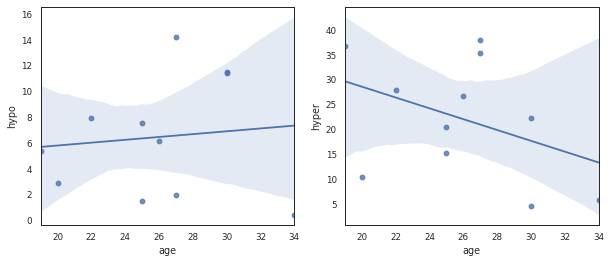

In [34]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x='age', y='hypo', data=diab, ax=axs[0])
sns.regplot(x='age', y='hyper', data=diab, ax=axs[1])
plt.show()

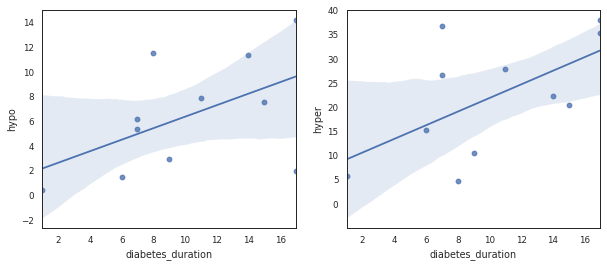

In [37]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x='diabetes_duration', y='hypo', data=diab, ax=axs[0])
sns.regplot(x='diabetes_duration', y='hyper', data=diab, ax=axs[1])
plt.show()

In [39]:
import statsmodels.api as sm

diab = sm.add_constant(diab)

model = sm.OLS(diab['hypo'], diab[info.columns])
res = model.fit()
print(res.summary())

model = sm.OLS(diab['hyper'], diab[info.columns])
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   hypo   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              7.657
Date:                Tue, 26 Oct 2021   Prob (F-statistic):                       0.275
Time:                        21:19:31   Log-Likelihood:                         -14.273
No. Observations:                  11   AIC:                                      48.55
Df Residuals:                       1   BIC:                                      52.53
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/local/home/evanweenen/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/local/home/evanweenen/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
